**I was terribly mistaken while coding this, as I had no proper idea of data count difference and unit difference with observational one with the model, but I am uploading anyway to keep track of my works**

In [ ]:
!pip install xarray netCDF4 matplotlib cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 91.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 59.6 MB/s eta 0:00:00


In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving pr_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_19650516-20140916.nc to pr_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_19650516-20140916.nc


In [ ]:
file_name = 'pr_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_19650516-20140916.nc'

In [ ]:
ds = xr.open_dataset(file_name)
print(ds)

<xarray.Dataset> Size: 775kB
Dimensions:    (time: 250, bnds: 2, lat: 32, lon: 24)
Coordinates:
  * time       (time) datetime64[ns] 2kB 1965-05-16T12:00:00 ... 2014-09-16
  * lat        (lat) float64 256B 5.625 6.875 8.125 9.375 ... 41.88 43.12 44.38
  * lon        (lon) float64 192B 60.94 62.81 64.69 66.56 ... 100.3 102.2 104.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 4kB ...
    lat_bnds   (lat, bnds) float64 512B ...
    lon_bnds   (lon, bnds) float64 384B ...
    pr         (time, lat, lon) float32 768kB ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    creation_date:          2019-11-08T08:26:37Z
    ...                     ...
    variable_id:            pr
    variant_label:          r1i1p1f1
    version:                v20191108
    cmor_version:           3.4.0
    tra

In [ ]:
# Convert time to datetime if not already
ds['time'] = xr.decode_cf(ds).time

# Select years 1965 to 2014
ds_sel = ds.sel(time=slice('1965-05-01', '2014-09-30'))

# Select months May (5) to September (9)
months = [5, 6, 7, 8, 9]
ds_sel = ds_sel.sel(time=ds_sel['time.month'].isin(months))

In [ ]:
# Adjust names if your dataset uses 'lat'/'lon' or 'latitude'/'longitude'
ds_sel = ds_sel.sel(lat=slice(45, 5), lon=slice(105,60))

In [ ]:
pr_mean = ds_sel['pr'].mean(dim='time')

In [ ]:
print(ds.data_vars)

Data variables:
    time_bnds  (time, bnds) datetime64[ns] 4kB ...
    lat_bnds   (lat, bnds) float64 512B ...
    lon_bnds   (lon, bnds) float64 384B ...
    pr         (time, lat, lon) float32 768kB ...


In [ ]:
ds['time'] = xr.decode_cf(ds).time

In [ ]:
ds_sel = ds.sel(time=slice('1965-05-01', '2014-09-30'))
ds_sel = ds_sel.sel(time=ds_sel['time.month'].isin([5,6,7,8,9]))

In [ ]:
ds_sel = ds_sel.sel(lat=slice(45, 5), lon=slice(105, 60))

In [ ]:
print(pr_mean.size, pr_mean.dtype)

0 float32


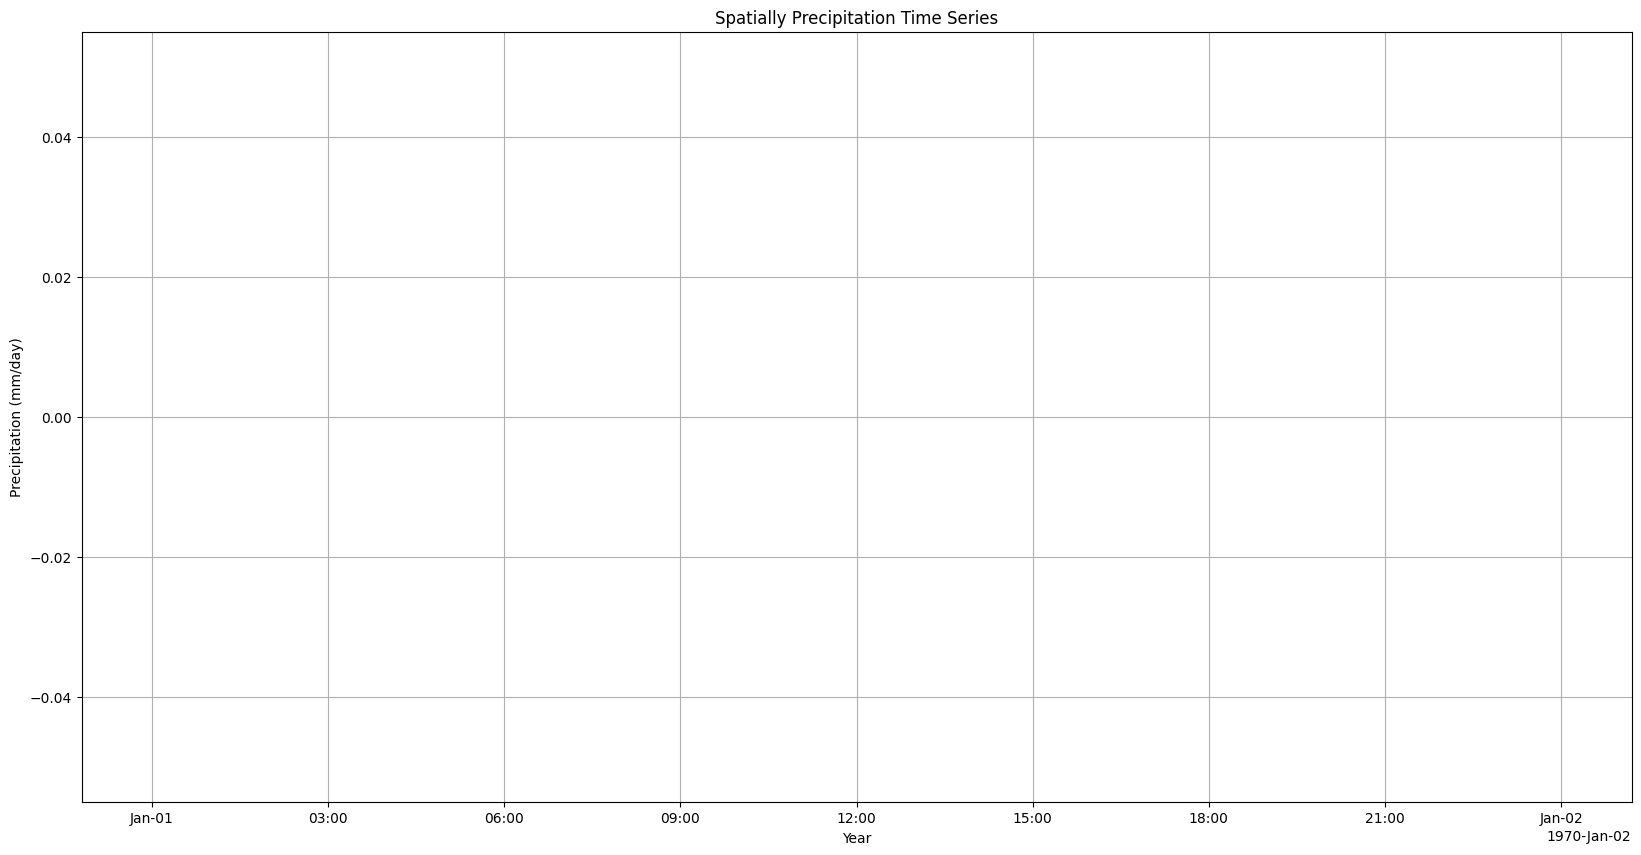

In [ ]:
s_sel = ds.sel(lat=slice(45, 5), lon=slice(105,60))

# Calculate spatial mean precipitation over lat/lon
pr_spatial_mean = ds_sel['pr'].mean(dim=['lat', 'lon'])

# Convert units from kg m-2 s-1 to mm/day (multiply by 86400 seconds/day)
pr_spatial_mean_mm_day = pr_spatial_mean * 86400

# Plot precipitation time series
plt.figure(figsize=(20, 10))
pr_spatial_mean_mm_day.plot()
plt.title('Spatially Precipitation Time Series')
plt.ylabel('Precipitation (mm/day)')
plt.xlabel('Year')
plt.grid(True)
plt.show()

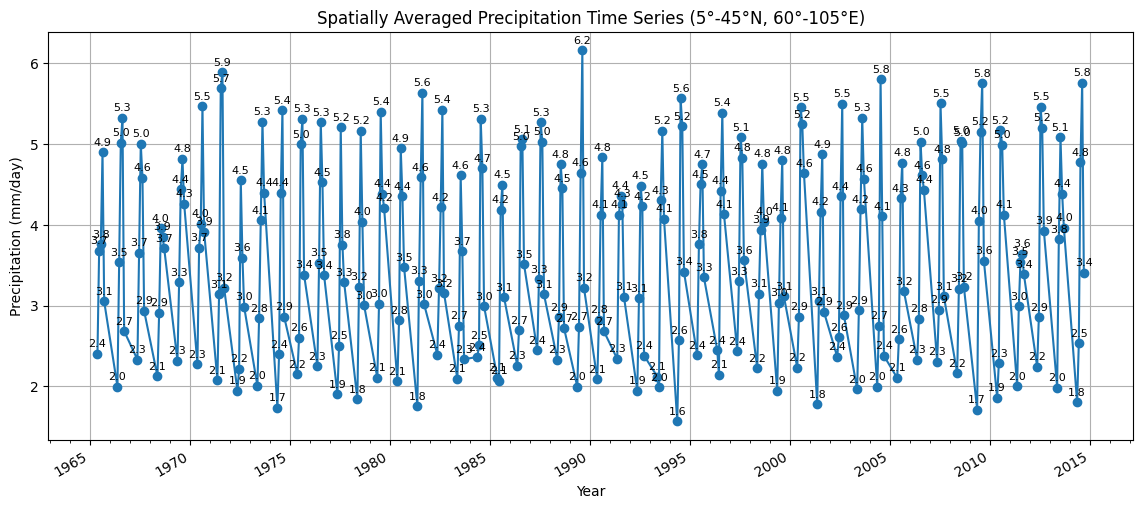

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load dataset and decode time
ds = xr.open_dataset(file_name)
ds['time'] = xr.decode_cf(ds).time

# Select spatial region
ds_sel = ds.sel(lat=slice(5, 45), lon=slice(60, 105))

# Calculate spatial mean precipitation
pr_spatial_mean = ds_sel['pr'].mean(dim=['lat', 'lon'])

# Convert units to mm/day (assuming original units are kg m-2 s-1)
pr_spatial_mean_mm_day = pr_spatial_mean * 86400

# Plot time series
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(pr_spatial_mean_mm_day['time'], pr_spatial_mean_mm_day, marker='o', linestyle='-')

# Annotate each point with precipitation value (rounded)
for time_val, pr_val in zip(pr_spatial_mean_mm_day['time'].values, pr_spatial_mean_mm_day.values):
    ax.annotate(f"{pr_val:.1f}", (mdates.date2num(time_val), pr_val),
                textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)

# Format x-axis for dates
ax.xaxis.set_major_locator(mdates.YearLocator(5))  # Major ticks every 5 years
ax.xaxis.set_minor_locator(mdates.YearLocator(1))  # Minor ticks every year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

fig.autofmt_xdate()  # Auto rotate date labels

# Labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Precipitation (mm/day)')
ax.set_title('Spatially Averaged Precipitation Time Series (5°-45°N, 60°-105°E)')

ax.grid(True)
plt.show()


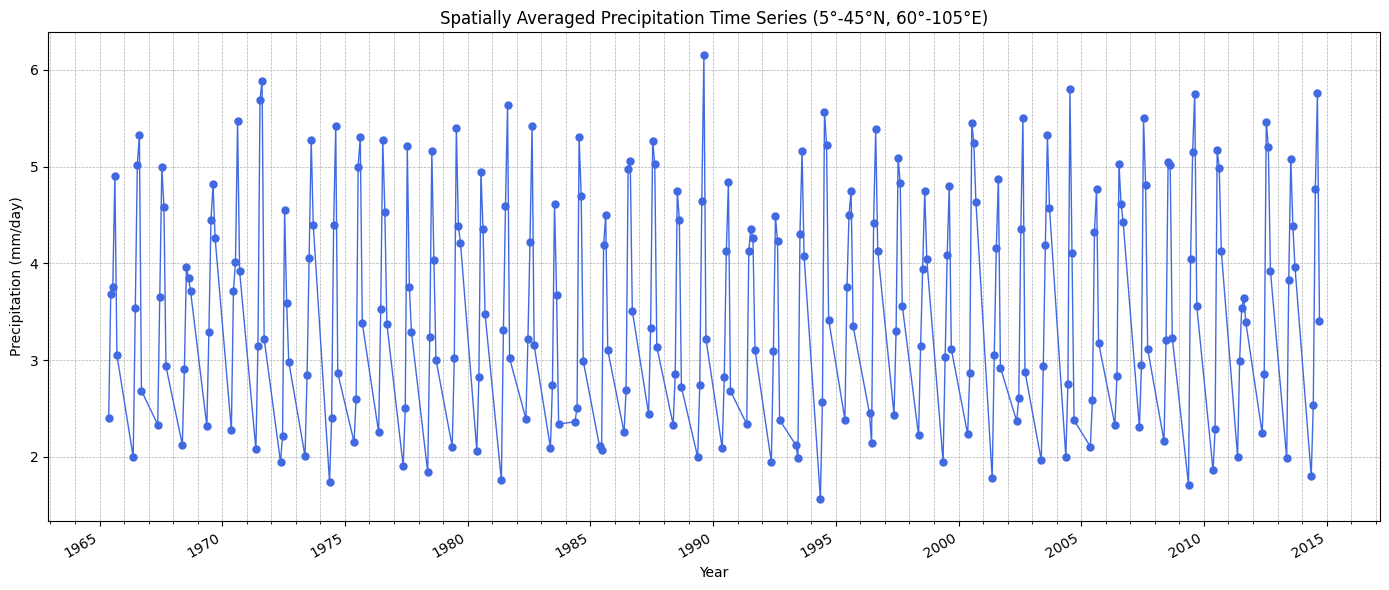

In [ ]:

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(pr_spatial_mean_mm_day['time'], pr_spatial_mean_mm_day, marker='o', linestyle='-', color='royalblue', markersize=5, linewidth=1)

# Format x-axis for better readability
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
fig.autofmt_xdate()

ax.set_xlabel('Year')
ax.set_ylabel('Precipitation (mm/day)')
ax.set_title('Spatially Averaged Precipitation Time Series (5°-45°N, 60°-105°E)')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# Convert to DataFrame
df = pr_spatial_mean_mm_day.to_dataframe().reset_index()

# Display the first few rows
print(df.head())

                 time        pr
0 1965-05-16 12:00:00  2.402244
1 1965-06-16 00:00:00  3.679437
2 1965-07-16 12:00:00  3.757155
3 1965-08-16 12:00:00  4.898121
4 1965-09-16 00:00:00  3.051101


In [ ]:
import pandas as pd

# Set pandas option to display all rows (no truncation)
pd.set_option('display.max_rows', None)

# Now print the entire DataFrame
print(df)

                   time        pr
0   1965-05-16 12:00:00  2.402244
1   1965-06-16 00:00:00  3.679437
2   1965-07-16 12:00:00  3.757155
3   1965-08-16 12:00:00  4.898121
4   1965-09-16 00:00:00  3.051101
5   1966-05-16 12:00:00  1.996188
6   1966-06-16 00:00:00  3.536717
7   1966-07-16 12:00:00  5.014660
8   1966-08-16 12:00:00  5.327430
9   1966-09-16 00:00:00  2.683570
10  1967-05-16 12:00:00  2.332123
11  1967-06-16 00:00:00  3.654701
12  1967-07-16 12:00:00  4.999573
13  1967-08-16 12:00:00  4.583750
14  1967-09-16 00:00:00  2.934053
15  1968-05-16 12:00:00  2.124962
16  1968-06-16 00:00:00  2.909864
17  1968-07-16 12:00:00  3.958484
18  1968-08-16 12:00:00  3.852245
19  1968-09-16 00:00:00  3.711784
20  1969-05-16 12:00:00  2.316997
21  1969-06-16 00:00:00  3.291118
22  1969-07-16 12:00:00  4.442323
23  1969-08-16 12:00:00  4.814579
24  1969-09-16 00:00:00  4.261435
25  1970-05-16 12:00:00  2.274898
26  1970-06-16 00:00:00  3.712567
27  1970-07-16 12:00:00  4.010949
28  1970-08-16

In [ ]:
for var in ds.data_vars:
    units = ds[var].attrs.get('units', 'No units attribute found')
    print(f"Variable: {var}, Units: {units}")

NameError: name 'ds' is not defined

In [ ]:
s_sel = ds.sel(lat=slice(5, 45), lon=slice(60, 105))

# Convert precipitation units to mm/day (assuming kg m-2 s-1)
pr_mm_day = ds_sel['pr'] * 86400

# Select months May(5) to September(9)
pr_sel = pr_mm_day.sel(time=pr_mm_day['time.month'].isin([5,6,7,8,9]))

In [ ]:
# Group by year and calculate mean and std of the 5 months' precipitation
yearly_stats = df.groupby(df['time'].dt.year)['pr'].agg(['mean', 'std']).reset_index()
yearly_stats.rename(columns={'time': 'year'}, inplace=True)

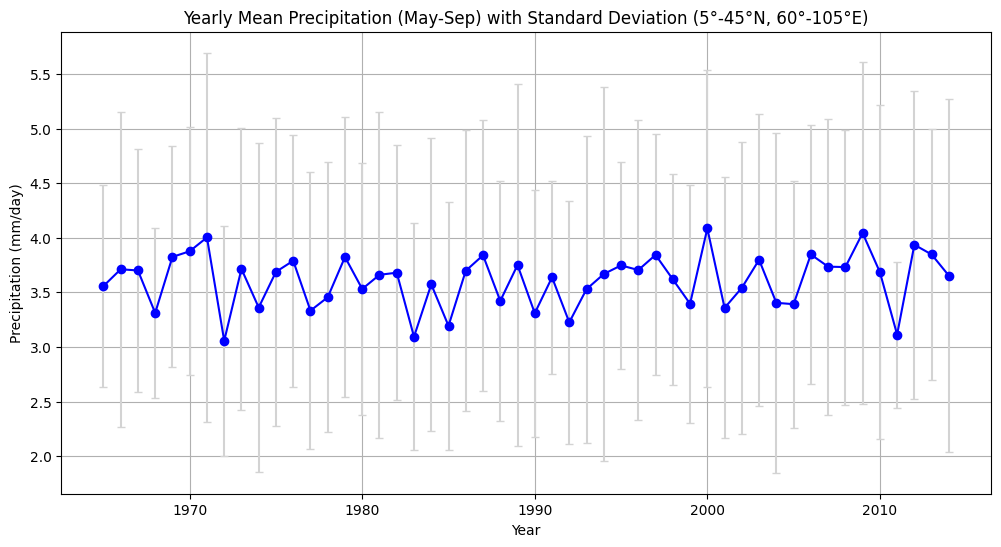

In [ ]:
# Plot mean precipitation with error bars for std deviation
plt.figure(figsize=(12,6))
plt.errorbar(yearly_stats['year'], yearly_stats['mean'], yerr=yearly_stats['std'],
             fmt='-o', ecolor='lightgray', capsize=3, color='b')

plt.xlabel('Year')
plt.ylabel('Precipitation (mm/day)')
plt.title('Yearly Mean Precipitation (May-Sep) with Standard Deviation (5°-45°N, 60°-105°E)')
plt.grid(True)
plt.show()

In [ ]:
yearly_stats.head()

,year,mean,std
0,1965,3.557612,0.927773
1,1966,3.711713,1.443861
2,1967,3.700840,1.110148
3,1968,3.311468,0.781090
4,1969,3.825290,1.013648


In [ ]:
pr_mm_day = ds_sel['pr'] * 86400

In [ ]:
pr_daily_mean = pr_mm_day.mean(dim=['lat', 'lon'])

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [ ]:
pr_map = pr_mm_day.isel(time=0)

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


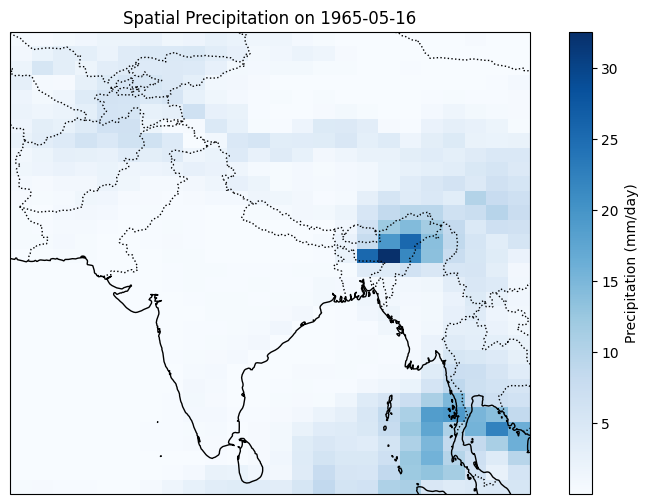

In [ ]:
pr_map = pr_mm_day.isel(time=0)  # or use pr_mm_day.mean(dim='time') for average

fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot precipitation spatially
im = pr_map.plot.pcolormesh(
    ax=ax,
    x='lon', y='lat',
    cmap='Blues',
    shading='auto',
    transform=ccrs.PlateCarree(),
    cbar_kwargs={'label': 'Precipitation (mm/day)'}
)

# Set map extent to your region
ax.set_extent([60, 105, 5, 45], crs=ccrs.PlateCarree())

# Add coastlines and borders
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

ax.set_title(f'Spatial Precipitation on {str(pr_map.time.values)[:10]}')
plt.show()


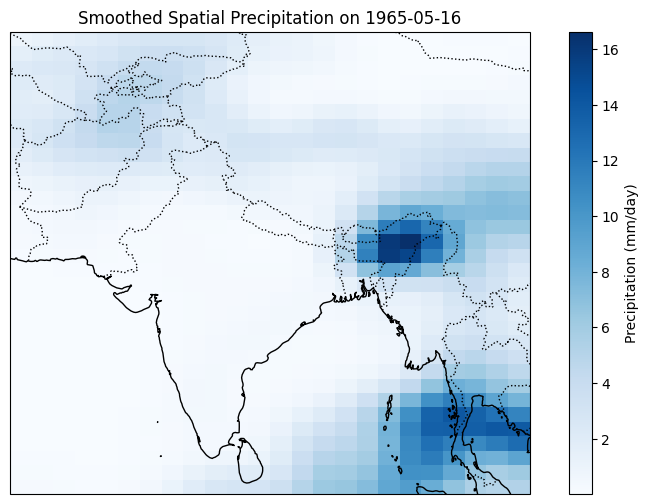

In [ ]:
import numpy as np
from scipy.ndimage import gaussian_filter

# Extract 2D precipitation data (lat x lon) for a single time slice
pr_data = pr_map.values  # 2D array

# Apply Gaussian smoothing; sigma controls smoothness (try 1-3)
pr_smoothed = gaussian_filter(pr_data, sigma=1)

# Create a new DataArray with smoothed data, preserving coords and dims
pr_smoothed_da = xr.DataArray(
    pr_smoothed,
    coords=pr_map.coords,
    dims=pr_map.dims,
    attrs=pr_map.attrs
)

# Plot smoothed data
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

im = pr_smoothed_da.plot.pcolormesh(
    ax=ax,
    x='lon', y='lat',
    cmap='Blues',
    shading='auto',
    transform=ccrs.PlateCarree(),
    cbar_kwargs={'label': 'Precipitation (mm/day)'}
)

ax.set_extent([60, 105, 5, 45], crs=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title(f'Smoothed Spatial Precipitation on {str(pr_map.time.values)[:10]}')
plt.show()

In [ ]:
# Select region and months May-Sep
ds_sel = ds.sel(lat=slice(5, 45), lon=slice(60, 105))
ds_sel = ds_sel.sel(time=ds_sel['time.month'].isin([5,6,7,8,9]))

# Convert units to mm/day
pr_mm_day = ds_sel['pr'] * 86400

# Group by year and average over May-Sep months
pr_yearly = pr_mm_day.groupby('time.year').mean(dim='time')

In [ ]:
pr_1965 = pr_yearly.sel(year=1965)

# Apply Gaussian smoothing (sigma controls smoothness)
pr_1965_smoothed = gaussian_filter(pr_1965.values, sigma=1)

# Create smoothed DataArray preserving coords and dims
pr_1965_smoothed_da = xr.DataArray(
    pr_1965_smoothed,
    coords=pr_1965.coords,
    dims=pr_1965.dims,
    attrs=pr_1965.attrs
)

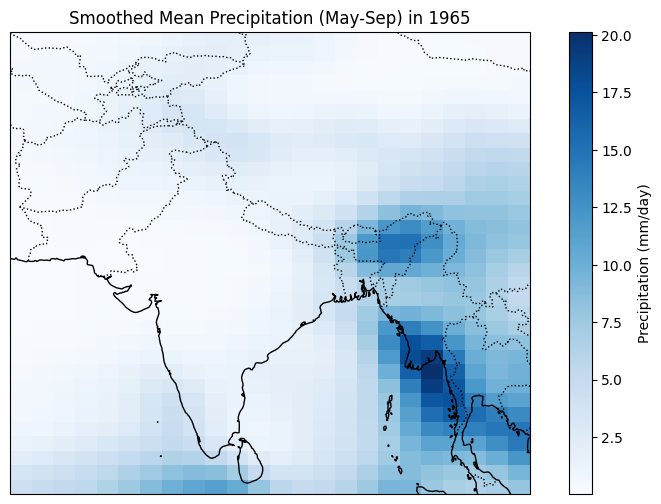

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

im = pr_1965_smoothed_da.plot.pcolormesh(
    ax=ax,
    x='lon', y='lat',
    cmap='Blues',
    shading='auto',
    transform=ccrs.PlateCarree(),
    cbar_kwargs={'label': 'Precipitation (mm/day)'}
)

ax.set_extent([60, 105, 5, 45], crs=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title('Smoothed Mean Precipitation (May-Sep) in 1965')
plt.show()

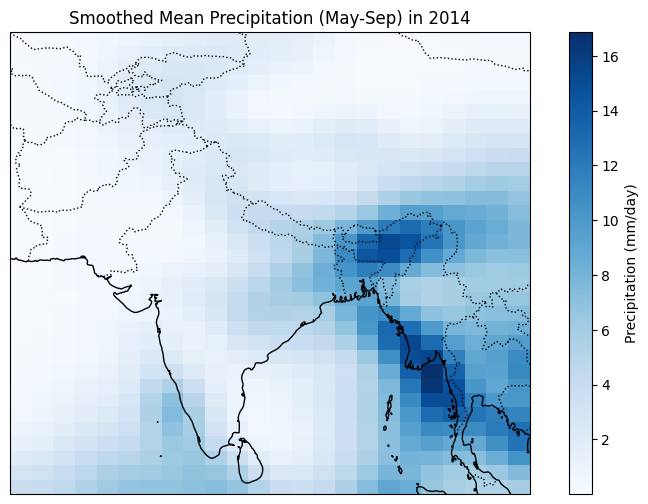

In [ ]:
pr_2014 = pr_yearly.sel(year=2014)

# Apply Gaussian smoothing (sigma controls smoothness)
pr_2014_smoothed = gaussian_filter(pr_2014.values, sigma=1)

# Create smoothed DataArray preserving coords and dims
pr_2014_smoothed_da = xr.DataArray(
    pr_2014_smoothed,
    coords=pr_2014.coords,
    dims=pr_2014.dims,
    attrs=pr_2014.attrs
)
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

im = pr_2014_smoothed_da.plot.pcolormesh(
    ax=ax,
    x='lon', y='lat',
    cmap='Blues',
    shading='auto',
    transform=ccrs.PlateCarree(),
    cbar_kwargs={'label': 'Precipitation (mm/day)'}
)

ax.set_extent([60, 105, 5, 45], crs=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title('Smoothed Mean Precipitation (May-Sep) in 2014')
plt.show()

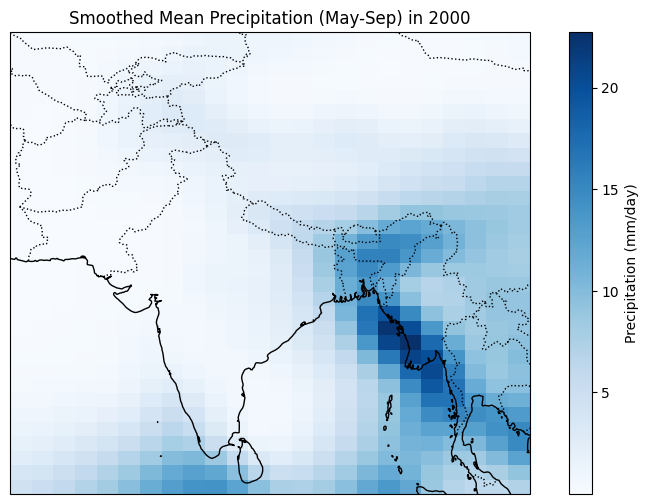

In [ ]:
pr_2000 = pr_yearly.sel(year=2000)

# Apply Gaussian smoothing (sigma controls smoothness)
pr_2000_smoothed = gaussian_filter(pr_2000.values, sigma=1)

# Create smoothed DataArray preserving coords and dims
pr_2000_smoothed_da = xr.DataArray(
    pr_2000_smoothed,
    coords=pr_2000.coords,
    dims=pr_2000.dims,
    attrs=pr_2000.attrs
)
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

im = pr_2000_smoothed_da.plot.pcolormesh(
    ax=ax,
    x='lon', y='lat',
    cmap='Blues',
    shading='auto',
    transform=ccrs.PlateCarree(),
    cbar_kwargs={'label': 'Precipitation (mm/day)'}
)

ax.set_extent([60, 105, 5, 45], crs=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title('Smoothed Mean Precipitation (May-Sep) in 2000')
plt.show()

In [ ]:
# Calculate spatial mean for each year
pr_yearly_spatial_mean = pr_yearly.mean(dim=['lat', 'lon'])

plt.figure(figsize=(14, 6))
pr_yearly_spatial_mean.plot(marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Precipitation (kg/m2)')
plt.title('Yearly Mean Spatially Averaged Precipitation (May-Sep, 1965-2014)')
plt.grid(True)
plt.show()

NameError: name 'pr_yearly' is not defined

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ERA 5 1965-2000.nc to ERA 5 1965-2000.nc


In [ ]:
era5_ds = xr.open_dataset('ERA 5 1965-2000.nc')
model_ds = xr.open_dataset('pr_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_19650516-20140916.nc')

NameError: name 'xr' is not defined

In [ ]:
print(era5_ds['tp'])

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/content/ERA 5 1965-2000.nc', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
print(model_ds['pr'])

<xarray.DataArray 'pr' (time: 250, lat: 32, lon: 24)> Size: 768kB
[192000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2kB 1965-05-16T12:00:00 ... 2014-09-16
  * lat      (lat) float64 256B 5.625 6.875 8.125 9.375 ... 41.88 43.12 44.38
  * lon      (lon) float64 192B 60.94 62.81 64.69 66.56 ... 100.3 102.2 104.1
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    comment:        includes both liquid and solid phases
    units:          kg m-2 s-1
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-11-08T08:26:36Z altered by CMOR: replaced missing va...


In [ ]:
import xarray as xr

try:
    print(f"ERA5 Dataset: {era5_ds}")
    for var in era5_ds.data_vars:
        if 'units' in era5_ds[var].attrs:
            print(f"  Variable: {var}, Units: {era5_ds[var].attrs['units']}")
        else:
            print(f"  Variable: {var}, Units: Not specified")
except FileNotFoundError:
    print(f"ERA5 file not found: {era5_ds}")

try:
    print(f"\nModel Dataset: {model_ds}")
    for var in model_ds.data_vars:
        if 'units' in model_ds[var].attrs:
            print(f"  Variable: {var}, Units: {model_ds[var].attrs['units']}")
        else:
            print(f"  Variable: {var}, Units: Not specified")
except FileNotFoundError:
    print(f"Model file not found: {model_ds}")


ERA5 file not found: ERA 5 1965-2000.nc
Model file not found: pr_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_19650516-20140916.nc


In [ ]:
# Select region and months (May-Sep)
ds_sel = era5_ds.sel(latitude=slice(45, 5), longitude=slice(60, 105))
ds_sel = ds_sel.sel(valid_time=slice('1965-05-01', '2000-09-30')) #Match time
ds_sel = ds_sel.sel(valid_time=ds_sel['valid_time.month'].isin([5, 6, 7, 8, 9]))

# Convert meters to mm
pr_mm = ds_sel['tp'] * 1000

# Replace NaNs with 0 to avoid NaN sums (optional, depends on your data)
pr_mm = pr_mm.fillna(0)

# Aggregate the precipitation in year
pr_annual = pr_mm.groupby('valid_time.year').sum()

# Take spatial mean in each year.
pr_spatial_mean = pr_annual.mean(dim=['latitude', 'longitude'])

# Subset for testing plot.
subset_era5 = pr_spatial_mean.isel(year=slice(0, 100))

print(subset_era5) #Important: Check this output

# Create test plot
subset_era5.plot()
plt.ylabel('Precipitation (mm)')
plt.title('Test plot for first 100 years')
plt.show()

NameError: name 'era5_ds' is not defined